## Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.pipeline import Pipeline
import pickle

## Loading Dataset

In [4]:
df=pd.read_csv('Student_admit.csv')

## EDA

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [6]:
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Admit              500 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 35.3 KB


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.574000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.494989
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,1.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [9]:
df=df.drop(columns=['Serial No.'])

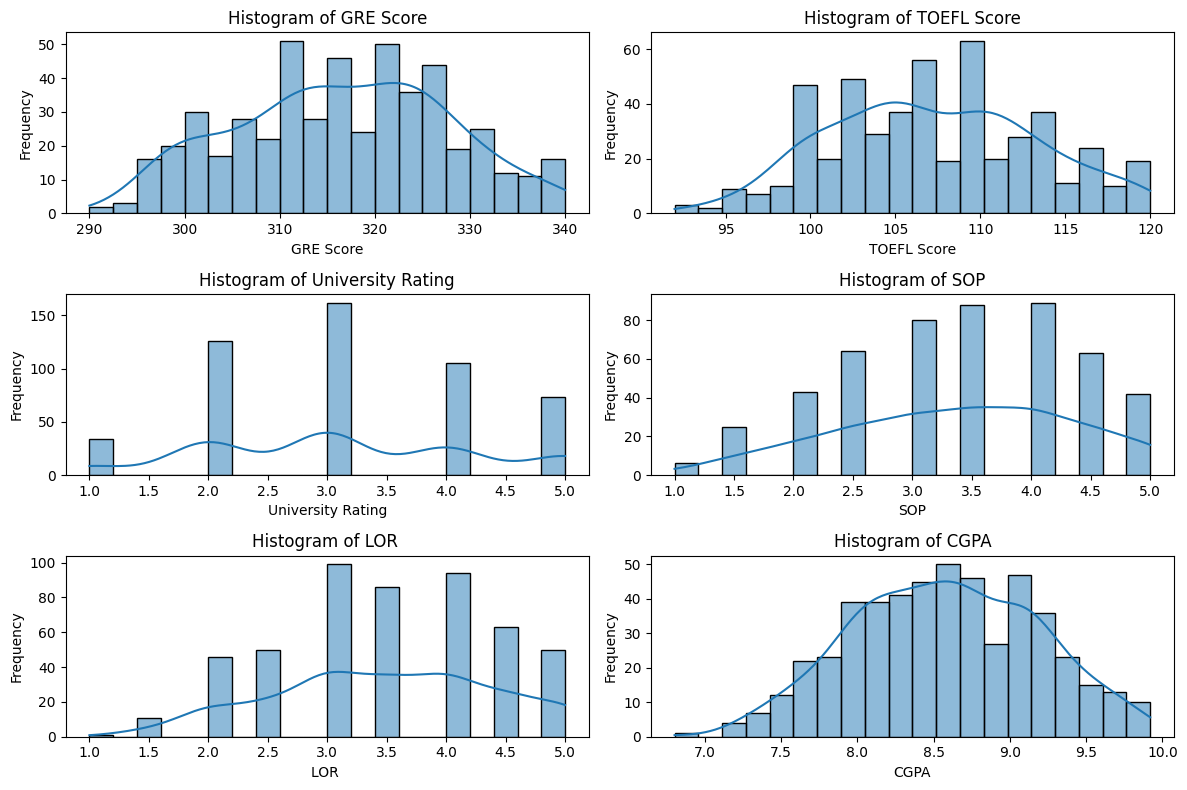

In [10]:
num_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histogram
for i, column in enumerate(num_cols):
    sns.histplot(x=df[column], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

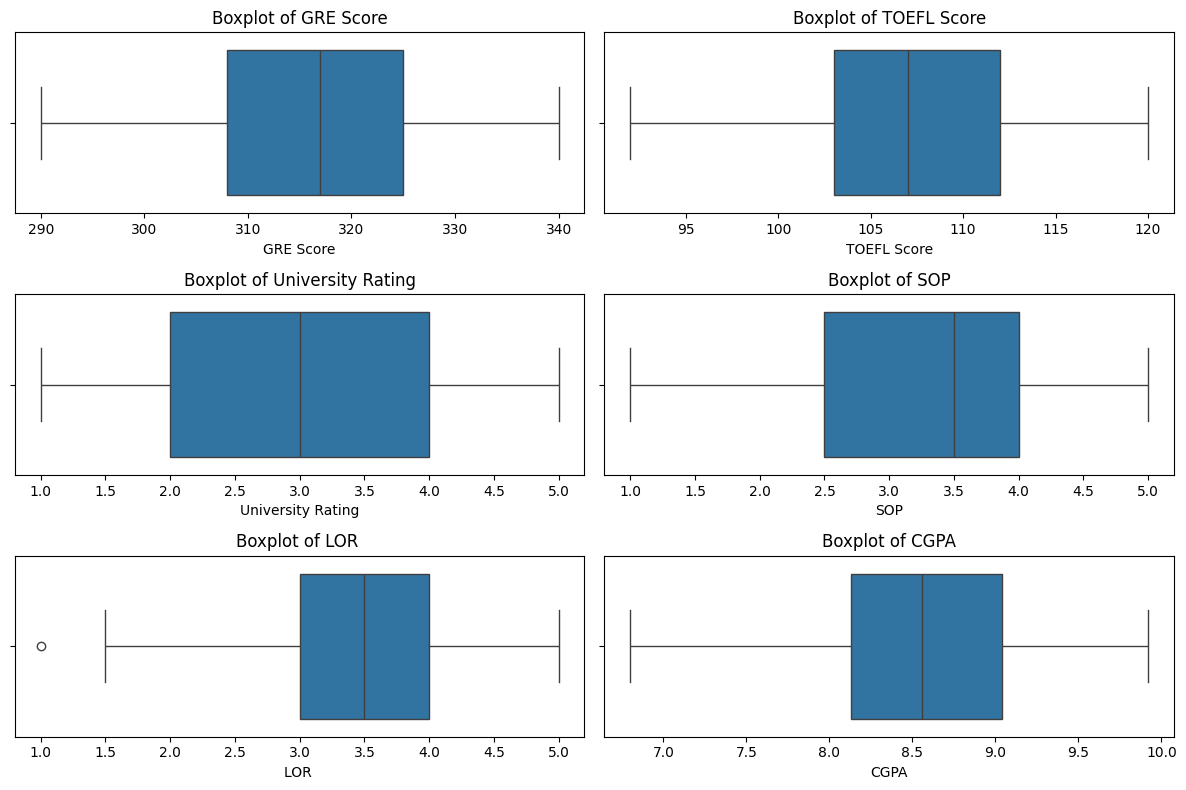

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot boxplot
for i, column in enumerate(num_cols):
    sns.boxplot(x=num_cols[i], data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {num_cols[i]}')

plt.tight_layout()
plt.show()

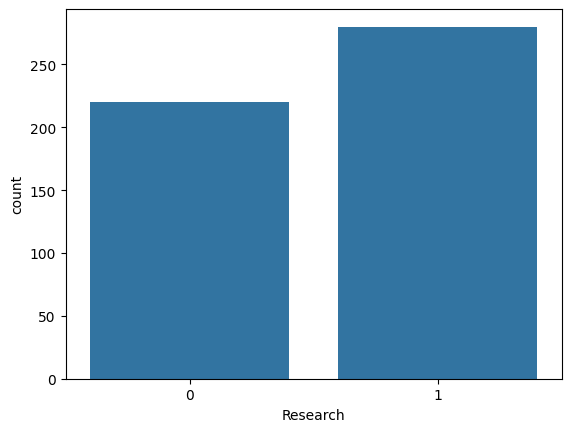

In [12]:
sns.countplot(x='Research',data=df)
plt.show()

## Splitting data into Training and Testing set

In [13]:
x=df.drop(columns=['Admit'])
y=df['Admit']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=48)

## Creating and Training the Pipeline

In [15]:
#  Columns to standardize
columns_to_standardize = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

# Pipeline steps
steps = [
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
]

# Column transformer to apply StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), columns_to_standardize)
    ],
    remainder='passthrough'
)

# Create the pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

# Fit the pipeline on training data
pipeline.fit(x_train, y_train)

# Make predictions
y_pred = pipeline.predict(x_test)

## Pipeline
 The pipeline consists of a preprocessor, implemented using `ColumnTransformer`, which applies specific transformations to different columns in the dataset. Specifically, it scales the numerical features using `StandardScaler`, leaving the 'Research' column untouched. The standardized features are then fed into a logistic regression model, which predicts the probability of admission based on the input features. This streamlined approach ensures consistent preprocessing and model fitting, simplifying the workflow for deployment, particularly in web interfaces like Streamlit.

In [16]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['GRE Score', 'TOEFL Score',
                                                   'University Rating', 'SOP',
                                                   'LOR ', 'CGPA'])])),
                ('classifier', LogisticRegression())])

## Model Evaluation

In [17]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Evaluation Metrics:
Accuracy: 0.9400
Precision: 1.0000
Recall: 0.8983
F1-Score: 0.9464


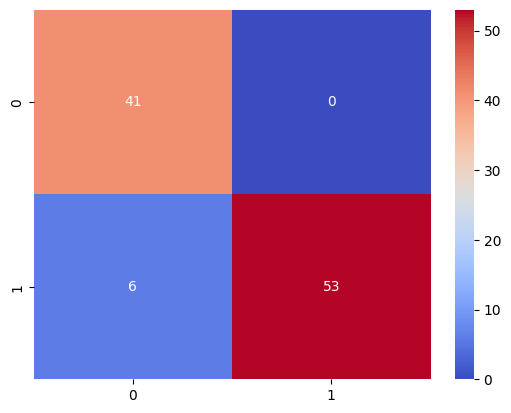

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
conf_matrix

array([[41,  0],
       [ 6, 53]])

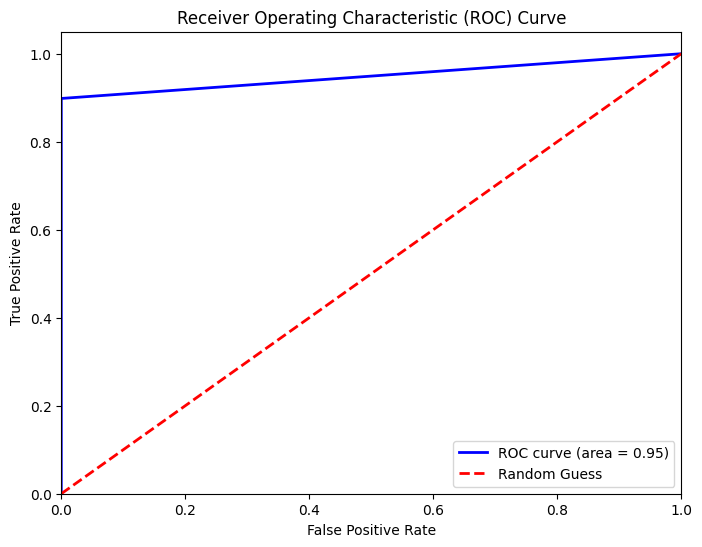

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Pickle is used to deploy the model using Streamlit as a web interface.

In [21]:
pickle.dump(pipeline, open('pipe.pkl','wb'))

## Conclusion

### Summary of Each Column:

1. **GRE Score**:
   - The GRE score represents applicants' performance in the Graduate Record Examination, with an average score of approximately 316.47.

2. **TOEFL Score**:
   - The TOEFL score reflects applicants' proficiency in the Test of English as a Foreign Language, with an average score of around 107.19.

3. **University Rating**:
   - This column provides ratings for the universities attended by applicants, with an average rating of approximately 3.11.

4. **SOP (Statement of Purpose)**:
   - SOP ratings convey applicants' academic interests and motivations for pursuing higher education, with an average rating of 3.37.

5. **LOR (Letter of Recommendation)**:
   - LOR ratings offer insights into applicants' academic abilities and character, with an average rating of approximately 3.48.

6. **CGPA (Cumulative Grade Point Average)**:
   - The CGPA represents applicants' cumulative grade point average, with an average score of 8.58.

- **Outliers**:
No significant outliers were detected in any of the columns.

### Modelling Approach

- **Feature Scaling**: To ensure uniformity in feature scales, I applied standard scaling to all numerical features. This preprocessing step is crucial for enhancing the performance of models like logistic regression, which benefit from standardized features.

- **Model Selection**: Logistic regression emerged as the ideal choice for our classification task due to its simplicity, efficiency, and interpretability. Given the binary nature of our target variable (admitted or not admitted), logistic regression aligns well with the task's requirements.

- **Pipeline Creation**: To streamline our workflow, I constructed a pipeline using scikit-learn's Pipeline class. This pipeline seamlessly integrates preprocessing and logistic regression modeling steps, ensuring a cohesive and efficient approach to model building.

### Evaluation metrics
1. **Accuracy (0.94)**:
   - Accuracy tells us how often the model is correct. In simpler terms, the model got it right about 94% of the time.

2. **Precision (0.9074)**:
   - Precision shows us how often the model correctly identifies positive cases. Put simply, when the model says something is positive, it's correct about 91% of the time.

3. **Recall (0.8983)**:
   - Recall measures how many of the actual positive cases the model finds. In everyday language, the model manages to catch about 90% of all positive instances.

4. **F1-Score (0.9474)**:
   - The F1-score balances precision and recall. It's like an overall grade for the model's performance, and here, it's around 91%, indicating solid performance overall.

5. **Confusion Matrix**:
   - The confusion matrix shows how the model did in detail. It correctly identified 41 negative cases and 53 positive cases. However, it mistakenly labeled 6 negative cases as positive and missed none of the positive cases.

6. **ROC curve**:
   - The ROC curve visualizes how well the model separates positive and negative cases. This curve suggests that the model performs excellently, with a high true positive rate and a low false positive rate, as indicated by the AUC of 0.94.

- **Note**:  While the model shows good performance, it could potentially achieve even better results with a larger dataset. Given the limited size of the dataset, consisting of only 500 records, there may be limitations to the model's generalizability. Therefore, acquiring more data could enhance the model's ability to capture underlying patterns and relationships, thereby improving its overall performance.